In [167]:
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import matplotlib.figure as fig
import pandas as pd

In [66]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [168]:
db_client = pymongo.MongoClient('localhost', 27017)

db_ice = db_client.ice
db_ice_posts = db_ice.posts
db_ice_comments = db_ice.comments
db_ice_users = db_ice.users

In [170]:
cursor = db_ice_posts.find({"vader":{"$exists": False}}).limit(2000000)
i = 0
lista = []
for p in cursor:
    lista += [p['_id']]
    c = clean(p['selftext'].replace("\'", "'").replace("\n", ""))
    v = vader.polarity_scores(c)
    db_ice_posts.update_one({'_id':p['_id']}, {"$set": {"vader": v}})
    i+=1
    if(i%1000==0):
        print(i)

In [171]:
cursor = db_ice_comments.find({"vader":{"$exists": False}}).limit(2000000)
i = 0
lista = []
for p in cursor:
    lista += [p['_id']]
    c = clean(p['body'].replace("\'", "'").replace("\n", ""))
    v = vader.polarity_scores(c)
    db_ice_comments.update_one({'_id':p['_id']}, {"$set": {"vader": v}})
    i+=1
    if(i%1000==0):
        print(i)

In [172]:
distribuicao_num_posts = [0 for a in range(0,500)]
for a in db_ice_users.find():
    distribuicao_num_posts[a["num_posts"]]+=1
for a in range(0,500):
    print(a," ",distribuicao_num_posts[a])

0   189848
1   172105
2   26552
3   10169
4   5036
5   2961
6   1934
7   1318
8   973
9   755
10   572
11   437
12   375
13   285
14   250
15   183
16   171
17   147
18   127
19   96
20   106
21   75
22   52
23   67
24   57
25   47
26   42
27   41
28   43
29   35
30   35
31   36
32   31
33   15
34   23
35   17
36   13
37   13
38   13
39   9
40   15
41   13
42   16
43   11
44   11
45   11
46   12
47   11
48   11
49   4
50   1
51   8
52   5
53   6
54   4
55   3
56   2
57   5
58   9
59   9
60   4
61   2
62   6
63   5
64   2
65   4
66   5
67   1
68   5
69   5
70   2
71   0
72   3
73   5
74   2
75   3
76   1
77   2
78   2
79   4
80   2
81   2
82   3
83   3
84   1
85   0
86   4
87   0
88   1
89   0
90   2
91   1
92   1
93   0
94   1
95   0
96   1
97   0
98   1
99   1
100   1
101   0
102   0
103   3
104   4
105   1
106   1
107   0
108   0
109   3
110   0
111   1
112   0
113   2
114   0
115   0
116   0
117   1
118   1
119   1
120   1
121   0
122   1
123   0
124   0
125   0
126   0
127   0
128 

In [186]:
np.sum(distribuicao_num_posts[10:])

3708

In [188]:
u = db_ice_users.find()
for a in u:
    if a["num_posts"]>10:
        usuarios += [[a["_id"], a["posts_id"]]]

In [189]:
usuario_e_tempos = []
for posts in usuarios:
    usu = posts[0]
    r = db_ice_posts.find({"_id": {"$in": posts[1]}})
    tempos = []
    for a in r:
        tempos += [a["created_utc"]]
    usuario_e_tempos += [[usu,tempos]]

In [88]:
for u in usuario_e_tempos:
    list.sort(u[1])
    tms = u[1]
    tempos_finais = []
    for i in range(1,len(tms)):
        tempos_finais += [tms[i]-tms[i-1]]
    u+=[tempos_finais]

In [126]:
medias = []
for u in usuario_e_tempos:
    arr = np.array(u[2])/(60*60*24)
    medias += [[np.mean(arr),np.std(arr),len(arr),u[0]]]

In [129]:
medias

[[7.0225936447811454, 11.495110091004685, 22, 't2_115l89'],
 [22.13320403439154, 28.208262862179932, 35, 't2_klq2g'],
 [112.8874861111111, 156.5899146175557, 15, 't2_bdw4c'],
 [3.675168164488017, 8.832391746376091, 17, 't2_69zvt'],
 [17.26475154320988, 13.408312781052356, 15, 't2_4r8ml'],
 [44.401786265432094, 92.11929108257021, 15, 't2_10515u'],
 [14.189353213507626, 15.811531644982368, 17, 't2_1bspuhgg'],
 [2.469011330409357, 3.1717444504156487, 57, 't2_wv9qn'],
 [7.436004464285714, 8.717179345777337, 14, 't2_27cwq24u'],
 [28.0097170781893, 21.072953146861437, 18, 't2_lvoey'],
 [46.60974605119826, 91.05786926058902, 17, 't2_6ug58'],
 [6.258040156151914, 8.767423209810588, 118, 't2_10gimq'],
 [17.426061921296295, 20.31714206205717, 16, 't2_9h4n8'],
 [12.938442460317459, 18.537732343712474, 14, 't2_eqd9y53'],
 [97.22840277777777, 149.22229250915473, 22, 't2_brivo'],
 [3.503146786492375, 3.487005836311893, 17, 't2_2w3r4fhp'],
 [7.541528128507295, 9.945611903579431, 33, 't2_swe7s'],
 [16

In [134]:
histograma_total = []
for u in usuario_e_tempos:
    histograma_total += u[2]

In [136]:
histograma_total = np.array(histograma_total)

In [163]:
y,x = np.histogram(histograma_total/(60*60*24), bins=100,range=(0,20))

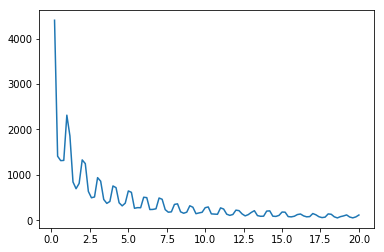

In [164]:
plt.plot(x[1:],y)

In [166]:
np.sum(y[0:10])

16303